<a href="https://colab.research.google.com/github/FlxLab/CASAICP-M5-Soundwaves/blob/main/CAS_AICP_M5_SoundWaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Sound and Waves with Python
- Creating and playing audio files
- In order to create and generate sound, it is helpful to understand some of the underlying physics, i.e. waves

This notebook is a copy and paste from http://uwmsk.org/jupyter/Jupyter_tutorial.html.

**Audio simulation 1: a simple sine wave tone generator**

The intensity of a single pure audio tone is given by the following formula:

$$I=sin(2πft)$$

where t is time, and f is the frequency of the tone in Hz.

To create our tone, we will use the numpy (Numerical Python) library.

We will create a 1.5 second tone that is composed of a certain number of samples per second. For this example, we will use a sampling frequency of 44,100 Hz, which is the same sampling frequency used for compact discs.

For this example, we will produce a 440 Hz tone, which is the A above middle C on a piano). One could use this tone to tune one's guitar or other instrument.

In [1]:
import numpy as np # load the Numerical Python library

fc = 440 # tone frequency --- A440
fs = 44100 # sampling frequency, Hz

T = 1.5 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*fc*t)

To play our tone, we will use the Python Audio library.

In [ ]:
from IPython.display import Audio

Audio(output, rate=fs)

**Audio simulation 2: Mixing two frequencies**

Let's start with two pure audio sine waves. For this example, we have chosen two sounds with frequencies of 15 and 17 Hz. The following bit of Python code will plot these two waveforms for us:

In [ ]:
# display inline on this page
%matplotlib inline

import matplotlib.pyplot as plt # load the Python plotting library

freq_1 = 15 #  frequency 1
freq_2 = 17 # frequency 2
fs = 3500 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

freq_1_output = np.sin(twopi*freq_1*t)
freq_2_output = np.sin(twopi*freq_2*t)

# now plot these two audio tones
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, freq_1_output)
axarr[0].set_title('frequency = 15 Hz')
axarr[1].plot(t, freq_2_output)
axarr[1].set_title('frequency = 17 Hz')
axarr[1].set_xlabel('seconds')

Next, we will then mix two tones together. As these two tones go in and out of phase with each other, an interference pattern will be produced.

The next bit of Python code plots this interference pattern for us:

In [ ]:
f1 = 15 #  frequency 1
f2 = 17 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)


import matplotlib.pyplot as plt # load the Python plotting library

plt.figure(figsize=(15,6))
plt.plot(t, output)
plt.ylabel("Intensity")
plt.xlabel("time (sec)")
plt.title("Interference pattern of two tones")
plt.show()

# Audio(output, rate=fs)

At the beginning of the plot, the two sounds are in phase with each other, so they add together, producing a signal that is twice as big as eithe of the original signals. When the two sounds are out of phase with each other, they cancel each other out. The frequency of this interference pattern is equal to the difference in the two frequencies. Since we have chosen two frequencies that differ by ony 2 Hz, the interference pattern will occur twice per second.

The frequencies of these two sine waves were chosen to make it easy to see the details of the interference pattern. However, both of these frequencies are below the range of human hearing. Therefore, let's raise each frequency up into the audio range, but still keep the difference in the two frequencies equal to 2 Hz. For this example, we will use tones of 370 and 372 Hz.

Let's plot these and see how the mixture looks...

In [ ]:
f1 = 370 #  frequency 1
f2 = 372 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)

import matplotlib.pyplot as plt # load the Python plotting library

plt.figure(figsize=(15,6))
plt.plot(t, output)
plt.ylabel("Intensity")
plt.xlabel("time (sec)")
plt.title("Interference pattern of two tones")
plt.show()

The following code will mix these two tones together and let us hear listen to the mixture.

In [ ]:
f1 = 370 #  frequency 1
f2 = 372 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)

Audio(output, rate=fs)

**Audio simulation 3: Doppler effect**

This tutorial is a bit mathematical. Skip it if you are not interested!

If you have ever heard the shift in frequency of a train horn as it passes by at a railroad crossing, you have heard the Doppler effect in action.

The Doppler effect is used by policemen to nab speeding motorists, and by ultrasonographers to measure the speed and direction of flowing blood.

For an observer at rest, Doppler shift is expressed by the following equation:

$$f_{obs}=f_{orig}\times\frac{c}{c+v}$$

where $f_{orig}$ is the original frequency,
c velocity of sound in the medium, $v$ the speed of the source, and $f_{obs}$ the observed frequency.

Another factor determining Doppler shift is the radial velocity of the sound source. If a train is coming directly toward you, its radial velocity will be the same as its actual velocity. The frequency of the horn will stay the same until it hits you. As soon as it hits you and drives away over your mangled, headless body, its frequency will immediately drop down in pitch and stay the same as it recedes in the distance.

Fortunately, most of the time we are not struck by oncoming trains because we are safely off the tracks, waiting for it to pass by. In this instance, the radial velocity is related to the actual velocity by the following equation:

$$v_{radial}=v_{source} \times \cos{\theta}$$

where θ is the angle between the source's forward velocity and the line of sight from the source to the observer.

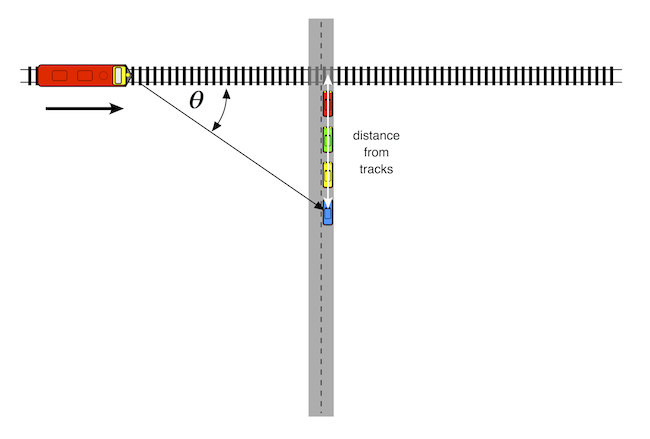


  An oncoming train's horn will be higher in pitch than that of a train standing still. As the train gets closer to the listener, the pitch of the horn drops in pitch. At the moment the train hits the crossing, the pitch will be the same as a stationary train. As the train travels away from the crossing, its pitch drops further.

So, let's assume that we are stopped at a train crossing, and our blue car is 50 m back from the tracks. The simulation below assumes that the train will be approaching from the left at 27 m/s. We will also assume that the train's horn is a single 1000 Hz tone, and that the speed of sound in air is 340 m/sec.

The following Python code plots the frequencies we will hear as the train goes by:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

forig = 1000 # original frequency in Hz
c = 340 # speed of sound in air in m/s
v = 27 # train velocity in m/s

# Make an array with radial speed of the train at every meter
d = np.arange(-150, 150, 1) # observation window (m)
b = 50 # distance from observer to tracks
v_rad = v * np.array(d)/np.sqrt(np.square(np.array(d)) + b*b) # cos(theta)

# Doppler effect fomulae
fobs = forig * c/(c + np.array(v_rad))

#print(fobs)

plt.figure(figsize=(9,6))
plt.axis([-150,150,800,1200])
plt.plot(d,fobs)
plt.axhline(y=1000, xmin=-150, xmax=150, linewidth=1, linestyle='--', color = 'r')
plt.ylabel("Frequency (Hz)")
plt.xlabel("train position relative to crossing (m)")
plt.title("Doppler shift at {velocity:.0f} m/s of {frequency:.0f} Hz train horn at {distance} meters from the tracks" .format(velocity = S, distance = b, frequency = vc))
plt.show()

Now, let's see what that sounds like. The following Python code will create an audio waveform we can listen to:

In [ ]:
fs = 44100 # sampling frequency, Hz
# transit time through our observation window
tt = 150/v
T = 2.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, tt, int(tt*fs), endpoint=False) # array with times

#t = (d + tt/2)/S
# thus St = d + tt/2 --> d = St - dmax/2S

# d = distance of train from crossing
d = v*np.array(t) - 150/2

#   add 0.00001 to b to prevent divide by 0 errors
v_rad = v*np.array(d)/np.sqrt(np.square(d) + (b+0.000001)*(b+0.000001))

# Doppler-shifted frequency component
fobs = forig * c/(c + v_rad)

output = np.sin(twopi*np.multiply(fobs, t))

Audio(output, rate=fs)

However, this 1000 Hz tone sounds more like a slide whistle than an actual train horn. Let's try one more audio simulation and see if we can create a more convincing train sound (NOT TODAY).